In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
import csv
header = ['filename','classes']
# Open the input and output files
with open('/content/drive/MyDrive/Damage Dataset New/check.txt', 'r') as infile, open('/content/drive/MyDrive/Damage Dataset New/output.csv', 'w', newline='') as outfile:
    reader = csv.reader(infile, delimiter=' ')
    writer = csv.writer(outfile)
    writer.writerow(header)
    # Loop through each row in the input file
    for row in reader:
        # Write each word in its own column to the output file
        writer.writerow(row)

In [14]:
df = pd.read_csv('/content/drive/MyDrive/Damage Dataset New/output.csv')

In [15]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)


In [16]:
y_cols = ['classes']
train_df['classes'] = train_df[y_cols].apply(lambda x: x.tolist(), axis=1)
val_df['classes'] = val_df[y_cols].apply(lambda x: x.tolist(), axis=1)
test_df['classes'] = test_df[y_cols].apply(lambda x: x.tolist(), axis=1)


In [17]:
datagen = ImageDataGenerator(rescale=1./255)

train_data = datagen.flow_from_dataframe(dataframe=train_df,
                                          x_col='filename',
                                          y_col='classes',
                                          target_size=(64, 64),
                                          batch_size=32
                                          )

val_data = datagen.flow_from_dataframe(dataframe=val_df,
                                        x_col='filename',
                                        y_col='classes',
                                        target_size=(64, 64),
                                        batch_size=32)

test_data = datagen.flow_from_dataframe(dataframe=test_df,
                                         x_col='filename',
                                         y_col='classes',
                                         target_size=(64, 64),
                                         batch_size=32,
                                         
                                         shuffle=False)


Found 881 validated image filenames belonging to 3 classes.
Found 207 validated image filenames belonging to 3 classes.


/usr/local/lib/python3.9/dist-packages/keras/preprocessing/image.py:1137: UserWarning: Found 1043 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/keras/preprocessing/image.py:1137: UserWarning: Found 274 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


Found 276 validated image filenames belonging to 3 classes.


/usr/local/lib/python3.9/dist-packages/keras/preprocessing/image.py:1137: UserWarning: Found 326 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


In [18]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

In [35]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, epochs=10, validation_data=val_data)


Epoch 1/10
28/28 [==============================] - 53s 2s/step - loss: 0.8696 - accuracy: 0.6390 - val_loss: 0.9192 - val_accuracy: 0.5845
Epoch 2/10
28/28 [==============================] - 51s 2s/step - loss: 0.8251 - accuracy: 0.6538 - val_loss: 0.9334 - val_accuracy: 0.5845
Epoch 3/10
28/28 [==============================] - 47s 2s/step - loss: 0.8082 - accuracy: 0.6515 - val_loss: 0.9174 - val_accuracy: 0.5749
Epoch 4/10
28/28 [==============================] - 50s 2s/step - loss: 0.7821 - accuracy: 0.6595 - val_loss: 0.8974 - val_accuracy: 0.6135
Epoch 5/10
28/28 [==============================] - 50s 2s/step - loss: 0.7164 - accuracy: 0.6947 - val_loss: 0.9825 - val_accuracy: 0.5749
Epoch 6/10
28/28 [==============================] - 50s 2s/step - loss: 0.6767 - accuracy: 0.7242 - val_loss: 1.1053 - val_accuracy: 0.5990
Epoch 7/10
28/28 [==============================] - 50s 2s/step - loss: 0.6762 - accuracy: 0.7015 - val_loss: 0.9873 - val_accuracy: 0.6135
Epoch 8/10
28/28 [==

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 128)        0

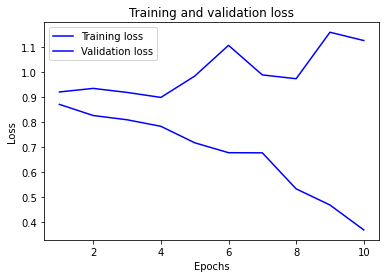

In [36]:
import matplotlib.pyplot as plt
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [37]:
loss, accuracy = model.evaluate(test_data)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

9/9 [==============================] - 10s 1s/step - loss: 1.2960 - accuracy: 0.5652
Test loss: 1.2959710359573364
Test accuracy: 0.5652173757553101


In [38]:
preds = model.predict(test_data)

9/9 [==============================] - 10s 1s/step


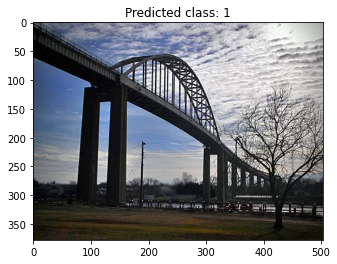

In [39]:
# Print a random image along with the predicted label
random_index = np.random.randint(len(test_data))
img = plt.imread(test_data.filepaths[random_index])
plt.imshow(img)
plt.title('Predicted class: ' + str(np.argmax(preds[random_index])))
plt.show()

1/1 [==============================] - 0s 103ms/step
Prediction : No Damage


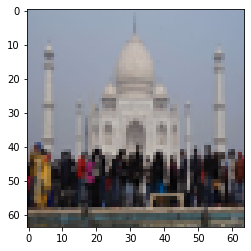

In [40]:
from PIL import Image
image = Image.open('/content/drive/MyDrive/Damage Dataset New/test1.jpg')
image = image.resize((64, 64))
image = np.array(image)
image = image / 255.0
plt.imshow(image)
image = np.expand_dims(image, axis=0)
prediction = model.predict(image)
class_index = np.argmax(prediction)
if(class_index == 0):
  print("Prediction : No Damage")
elif(class_index==1):
  print("Prediction : Mild Damage")
else:
  print("Prediction : Severe Damage")

1/1 [==============================] - 0s 53ms/step
Prediction : Mild Damage


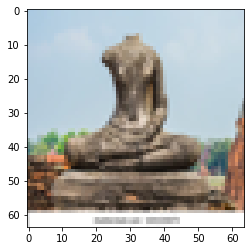

In [41]:
from PIL import Image
image = Image.open('/content/drive/MyDrive/Damage Dataset New/test2.jpg')
image = image.resize((64, 64))
image = np.array(image)
image = image / 255.0
plt.imshow(image)
image = np.expand_dims(image, axis=0)
prediction = model.predict(image)
class_index = np.argmax(prediction)
if(class_index == 0):
  print("Prediction : No Damage")
elif(class_index==1):
  print("Prediction : Mild Damage")
else:
  print("Prediction : Severe Damage")